In [19]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (15, 12)

import numpy as np
import nibabel as nib

<Figure size 1080x864 with 0 Axes>

(-0.5, 255.5, 255.5, -0.5)

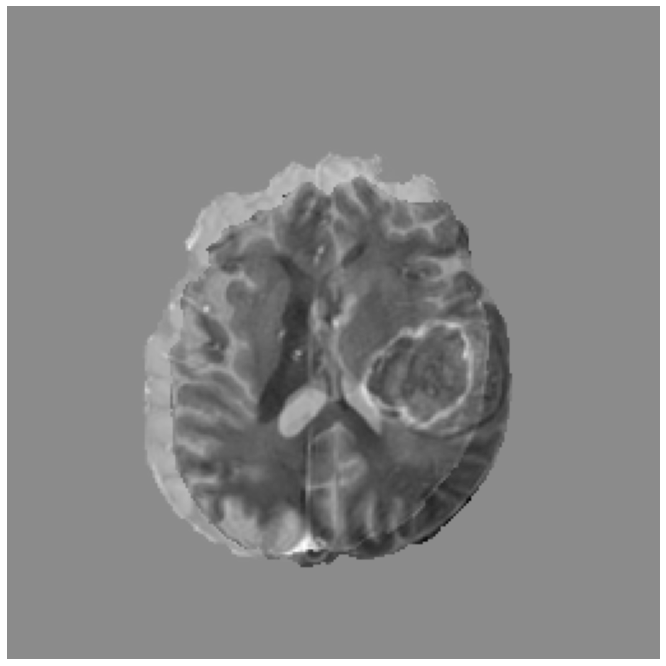

In [37]:
t1, t1ce = np.load('/home/srivathsa/projects/studies/gad/vmorph/data/brats/val/BraTS2021_00494.npz')['data']

# t1ce = rotate(t1ce, angle=-15, reshape=False, axes=(1, 2))
t1ce = np.clip(t1ce, 0, t1ce.max())
# plt.imshow(t1ce[64, 40:-30, 60:-50])
# plt.imshow(t1ce[64])
plt.imshow(t1ce[64] - t1[64])
plt.axis('off')

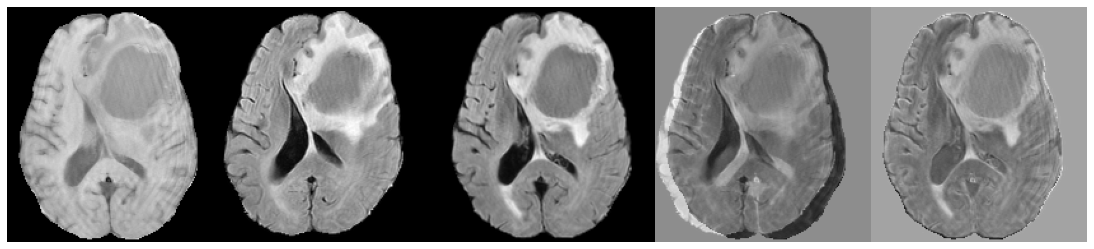

In [85]:
data_path = '/home/srivathsa/projects/studies/gad/vmorph/data/brats_fl/val'
pred_path = '/home/srivathsa/projects/studies/gad/vmorph/runs/20211012_050145-brats_fl/eval/preds'
cnum = 'BraTS2021_01554'
sl = 64

crop = lambda sl: sl[30:-25, 40:-30]

data = np.load('{}/{}.npz'.format(data_path, cnum))['data']
data[1] = np.clip(data[1], 0, data[1].max())
pred = np.load('{}/{}.npz'.format(pred_path, cnum))['pred']
pred = np.clip(pred, 0, pred.max())
diff1 = data[1] - data[0]
diff2 = pred - data[0]

fig, ax = plt.subplots(1, 5)

ax[0].imshow(crop(data[0, sl]))
ax[0].axis('off')
ax[1].imshow(crop(data[1, sl]))
ax[1].axis('off')
ax[2].imshow(crop(pred[sl]))
ax[2].axis('off')
ax[3].imshow(crop(diff1[sl]))
ax[3].axis('off')
ax[4].imshow(crop(diff2[sl]))
ax[4].axis('off')

fig.tight_layout(pad=0)

# disp = np.hstack([crop(data[0, sl]), crop(data[1, sl]), crop(diff1[sl]), crop(diff2[sl])])
# plt.imshow(disp)
# plt.axis('off')